In [3]:
library(tidyr)
library(dplyr)
library(tidyverse)
library(data.table)
library(lubridate)
library(broom)
library(survival)
library(mgcv)

In [4]:
#BUA
x <- load("mCA_clean_BUA.Rdata")
x

[1] "mCA_clean_BUA"

In [5]:
dim(mCA_clean_BUA)
ls(mCA_clean_BUA)

[1] 624969     19

[1] "age"          "age_squ"      "cf_cat"       "cf_max"       "chrom"       
 [6] "cll"          "cll_262_coh"  "cll_prs"      "cohort"       "ltl_262_coh" 
[11] "ltl_prs"      "mca_auto"     "mca_highrisk" "p_arm"        "person_id"   
[16] "q_arm"        "sex_at_birth" "smoking"      "type"

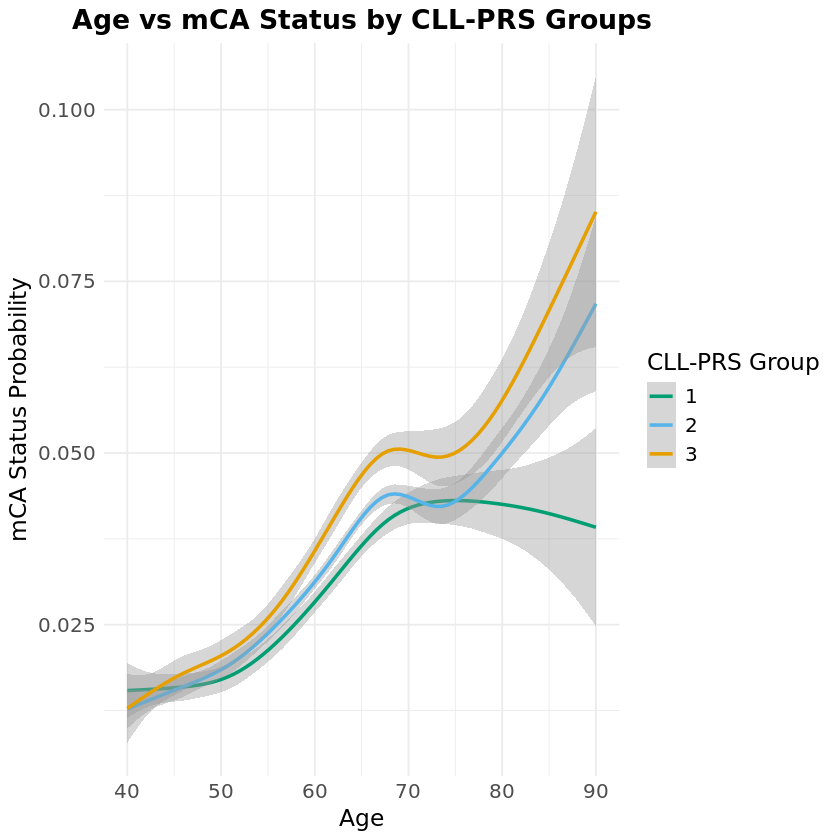

In [6]:
library(ggplot2)
ggplot(mCA_clean_BUA, aes(x = age, y = mca_auto, color = cll_262_coh)) +
  geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), se = TRUE) +
  scale_color_manual(values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00")) +
  labs(
    title = "Age vs mCA Status by CLL-PRS Groups",
    x = "Age",
    y = "mCA Status Probability",
    color = "CLL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

In [29]:
gam_model <- gam(mca_auto ~ s(age, bs = "cs") + cll_262_coh, data = mCA_clean_BUA, family = binomial)

In [30]:
age_points <- expand.grid(
  age = c(40, 50, 60, 70, 80), 
  cll_262_coh = factor(c("1", "2", "3"), levels = c("1", "2", "3")) 
)

In [31]:
predictions <- predict(gam_model, newdata = age_points, type = "response", se.fit = TRUE)
age_points$fit <- predictions$fit  
age_points$se <- predictions$se.fit 

age_points$lower <- age_points$fit - 1.96 * age_points$se
age_points$upper <- age_points$fit + 1.96 * age_points$se

print(age_points)

   age cll_262_coh        fit           se      lower      upper
1   40           1 0.01209317 0.0007067613 0.01070792 0.01347842
2   50           1 0.01681625 0.0004566435 0.01592123 0.01771127
3   60           1 0.02858071 0.0005841660 0.02743574 0.02972567
4   70           1 0.04057675 0.0009857348 0.03864471 0.04250879
5   80           1 0.04594343 0.0020335319 0.04195771 0.04992915
6   40           2 0.01312717 0.0007427258 0.01167142 0.01458291
7   50           2 0.01824663 0.0004209112 0.01742164 0.01907161
8   60           2 0.03098022 0.0004548865 0.03008864 0.03187180
9   70           2 0.04393785 0.0008701623 0.04223233 0.04564337
10  80           2 0.04972603 0.0020798785 0.04564946 0.05380259
11  40           3 0.01495001 0.0008646763 0.01325525 0.01664478
12  50           3 0.02076541 0.0005406535 0.01970573 0.02182509
13  60           3 0.03519374 0.0006659227 0.03388854 0.03649895
14  70           3 0.04982308 0.0011446042 0.04757966 0.05206651
15  80           3 0.0563

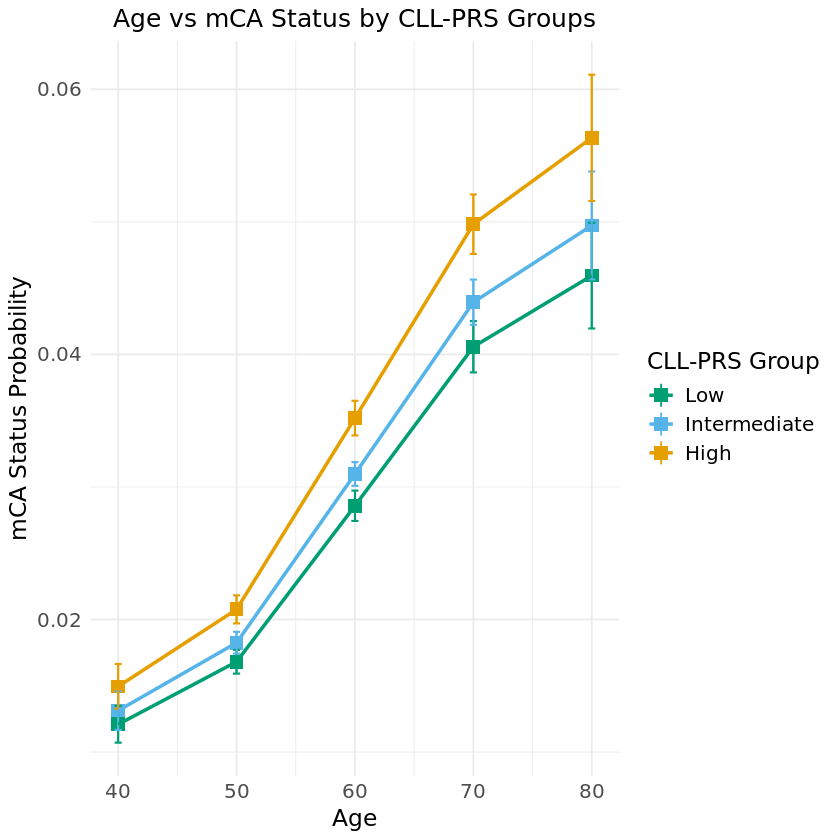

In [33]:
p <- ggplot(age_points, aes(x = age, y = fit, color = cll_262_coh)) +
  geom_pointrange(aes(ymin = lower, ymax = upper), size = 0.8, shape = 15, fill = "white") + 
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.6, size = 0.6) +
  geom_line(size = 1) +
  scale_color_manual(
    values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00"),
    labels = c("1" = "Low", "2" = "Intermediate", "3" = "High")
  ) +
  labs(
    title = "Age vs mCA Status by CLL-PRS Groups",
    x = "Age",
    y = "mCA Status Probability",
    color = "CLL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 15),  
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",  
    legend.title = element_text(size = 14), 
    legend.text = element_text(size = 12)  
  )
p

In [34]:
library(sjPlot)

In [36]:
save_plot("CLL_PRS_mCA.svg", fig = p, width=20, height=15)

png 
  2

In [37]:
gam_model <- gam(mca_auto ~ s(age, bs = "cs") + ltl_262_coh, data = mCA_clean_BUA, family = binomial)

In [38]:
age_points <- expand.grid(
  age = c(40, 50, 60, 70, 80), 
  ltl_262_coh = factor(c("1", "2", "3"), levels = c("1", "2", "3")) 
)
predictions <- predict(gam_model, newdata = age_points, type = "response", se.fit = TRUE)
age_points$fit <- predictions$fit  
age_points$se <- predictions$se.fit 

age_points$lower <- age_points$fit - 1.96 * age_points$se
age_points$upper <- age_points$fit + 1.96 * age_points$se

print(age_points)

   age ltl_262_coh        fit           se      lower      upper
1   40           1 0.01262145 0.0007366117 0.01117769 0.01406521
2   50           1 0.01757628 0.0004735057 0.01664820 0.01850435
3   60           1 0.02986422 0.0005992863 0.02868962 0.03103883
4   70           1 0.04239263 0.0010174764 0.04039837 0.04438688
5   80           1 0.04801546 0.0021155267 0.04386903 0.05216189
6   40           2 0.01291901 0.0007321644 0.01148397 0.01435405
7   50           2 0.01798852 0.0004156087 0.01717393 0.01880311
8   60           2 0.03055572 0.0004507439 0.02967226 0.03143917
9   70           2 0.04336124 0.0008604452 0.04167477 0.04504771
10  80           2 0.04910596 0.0020582313 0.04507183 0.05314010
11  40           3 0.01491884 0.0008629881 0.01322738 0.01661029
12  50           3 0.02075659 0.0005410747 0.01969608 0.02181710
13  60           3 0.03518833 0.0006663340 0.03388231 0.03649434
14  70           3 0.04983552 0.0011481681 0.04758511 0.05208593
15  80           3 0.0563

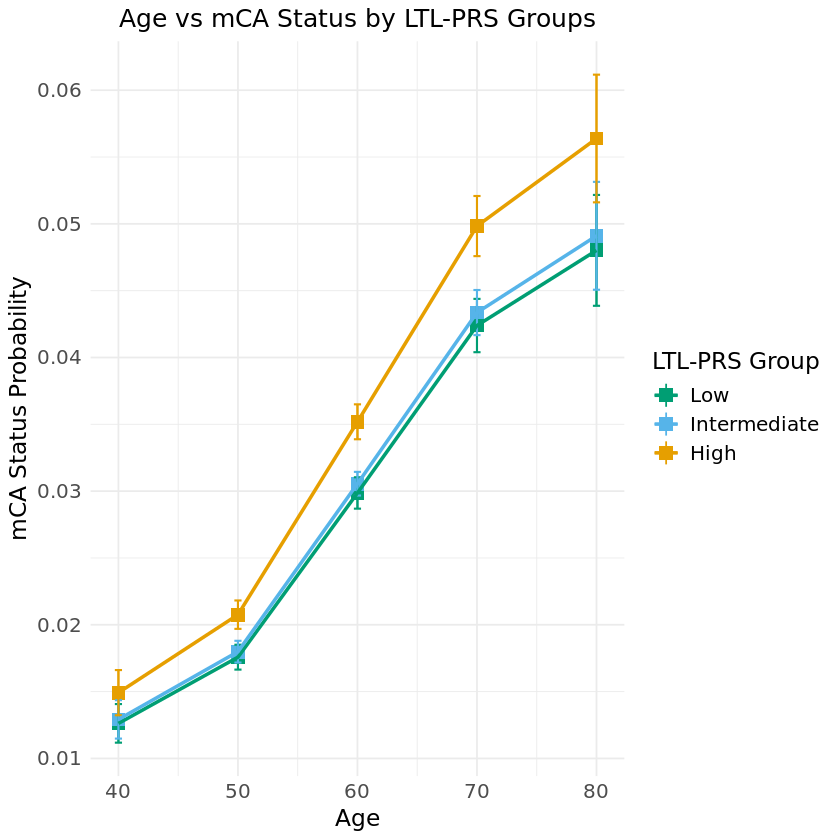

In [40]:
p<- ggplot(age_points, aes(x = age, y = fit, color = ltl_262_coh)) +
  geom_pointrange(aes(ymin = lower, ymax = upper), size = 0.8, shape = 15, fill = "white") + 
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.6, size = 0.6) +
  geom_line(size = 1) +
  scale_color_manual(
    values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00"),
    labels = c("1" = "Low", "2" = "Intermediate", "3" = "High")
  ) +
  labs(
    title = "Age vs mCA Status by LTL-PRS Groups",
    x = "Age",
    y = "mCA Status Probability",
    color = "LTL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 15),  
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",  
    legend.title = element_text(size = 14), 
    legend.text = element_text(size = 12)  
  )
p

In [41]:
save_plot("LTL_PRS_mCA.svg", fig = p, width=20, height=15)

png 
  2

In [20]:
#High Risk
table(mCA_clean_BUA$mca_highrisk)
mCA_clean_BUA_high <- filter(mCA_clean_BUA,mCA_clean_BUA$mca_highrisk==0 | mCA_clean_BUA$mca_highrisk==1)
mCA_clean_BUA_high <- mCA_clean_BUA_high %>%
  mutate(mca_highrisk = ifelse(mca_highrisk == 2, NA, mca_highrisk)) 
table(mCA_clean_BUA_high$mca_highrisk)


     0      1      2 
600850   2618  21501 


     1      2 
600850   2618 

In [21]:
mCA_clean_BUA_high$mca_highrisk <- ifelse(mCA_clean_BUA_high$mca_highrisk ==1, 0, mCA_clean_BUA_high$mca_highrisk)
mCA_clean_BUA_high$mca_highrisk <- ifelse(mCA_clean_BUA_high$mca_highrisk ==2, 1, mCA_clean_BUA_high$mca_highrisk)
table(mCA_clean_BUA_high$mca_highrisk)


     0      1 
600850   2618 

In [42]:
gam_model <- gam(mca_highrisk ~ s(age, bs = "cs") + cll_262_coh, data = mCA_clean_BUA_high, family = binomial)

In [43]:
age_points <- expand.grid(
  age = c(45, 55, 65, 75, 85), 
  cll_262_coh = factor(c("1", "2", "3"), levels = c("1", "2", "3")) 
)
predictions <- predict(gam_model, newdata = age_points, type = "response", se.fit = TRUE)
age_points$fit <- predictions$fit  
age_points$se <- predictions$se.fit 

age_points$lower <- age_points$fit - 1.96 * age_points$se
age_points$upper <- age_points$fit + 1.96 * age_points$se

print(age_points)

   age cll_262_coh          fit           se        lower        upper
1   45           1 0.0008168391 6.800518e-05 0.0006835489 0.0009501292
2   55           1 0.0017942766 1.125292e-04 0.0015737194 0.0020148338
3   65           1 0.0038701579 2.255536e-04 0.0034280728 0.0043122429
4   75           1 0.0067053729 4.560549e-04 0.0058115053 0.0075992404
5   85           1 0.0095168778 1.010219e-03 0.0075368495 0.0114969062
6   45           2 0.0012941461 8.621630e-05 0.0011251621 0.0014631300
7   55           2 0.0028411096 1.076081e-04 0.0026301977 0.0030520216
8   65           2 0.0061206940 1.834312e-04 0.0057611687 0.0064802192
9   75           2 0.0105870925 4.894264e-04 0.0096278167 0.0115463683
10  85           2 0.0150015880 1.401575e-03 0.0122545013 0.0177486747
11  45           3 0.0020532448 1.456827e-04 0.0017677067 0.0023387828
12  55           3 0.0045035088 2.026080e-04 0.0041063971 0.0049006205
13  65           3 0.0096834190 3.726200e-04 0.0089530838 0.0104137542
14  75

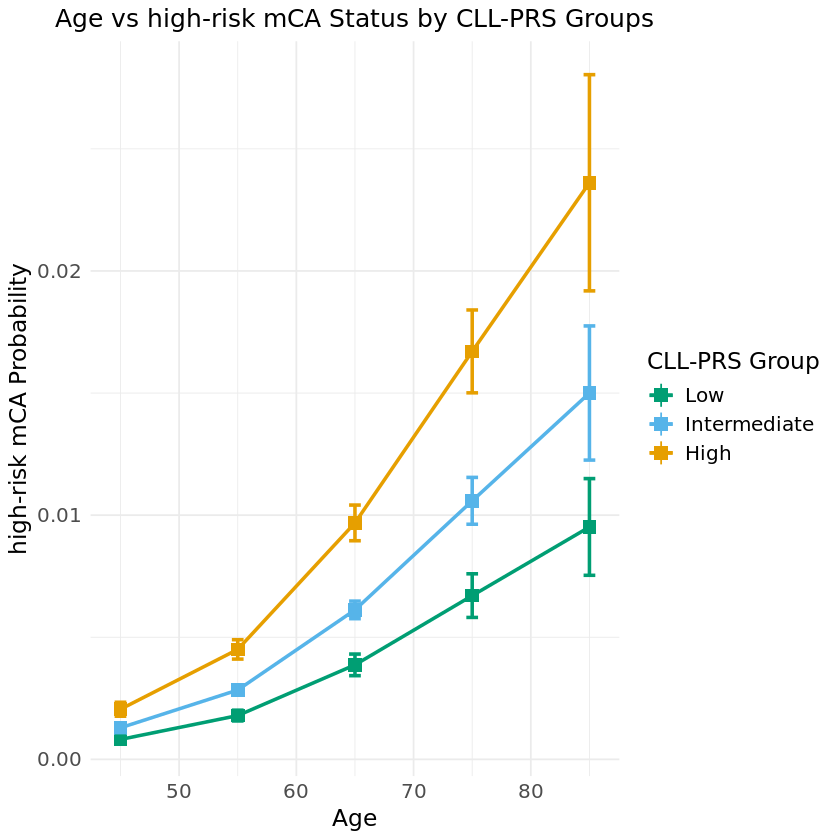

In [45]:
p <- ggplot(age_points, aes(x = age, y = fit, color = cll_262_coh)) +
  geom_pointrange(aes(ymin = lower, ymax = upper), size = 0.8, shape = 15, fill = "white") + 
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 1, size = 1) +
  geom_line(size = 1) +
  scale_color_manual(
    values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00"),
    labels = c("1" = "Low", "2" = "Intermediate", "3" = "High")
  ) +
  labs(
    title = "Age vs high-risk mCA Status by CLL-PRS Groups",
    x = "Age",
    y = "high-risk mCA Probability",
    color = "CLL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 15),  
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",  
    legend.title = element_text(size = 14), 
    legend.text = element_text(size = 12)  
  )
p

In [46]:
save_plot("CLL_PRS_highmCA.svg", fig = p, width=20, height=15)

png 
  2

In [47]:
gam_model <- gam(mca_highrisk ~ s(age, bs = "cs") + ltl_262_coh, data = mCA_clean_BUA_high, family = binomial)

In [48]:
age_points <- expand.grid(
  age = c(45, 55, 65, 75, 85), 
  ltl_262_coh = factor(c("1", "2", "3"), levels = c("1", "2", "3")) 
)
predictions <- predict(gam_model, newdata = age_points, type = "response", se.fit = TRUE)
age_points$fit <- predictions$fit  
age_points$se <- predictions$se.fit 

age_points$lower <- age_points$fit - 1.96 * age_points$se
age_points$upper <- age_points$fit + 1.96 * age_points$se

print(age_points)

   age ltl_262_coh         fit           se        lower       upper
1   45           1 0.001101393 8.629398e-05 0.0009322572 0.001270530
2   55           1 0.002425057 1.352523e-04 0.0021599622 0.002690151
3   65           1 0.005241349 2.650059e-04 0.0047219373 0.005760760
4   75           1 0.009062852 5.595970e-04 0.0079660422 0.010159662
5   85           1 0.012764489 1.306483e-03 0.0102037830 0.015325195
6   45           2 0.001341141 8.931799e-05 0.0011660780 0.001516205
7   55           2 0.002952084 1.112388e-04 0.0027340560 0.003170112
8   65           2 0.006376517 1.885117e-04 0.0060070337 0.006745999
9   75           2 0.011016513 5.073545e-04 0.0100220980 0.012010927
10  85           2 0.015503619 1.449290e-03 0.0126630105 0.018344228
11  45           3 0.001603160 1.178309e-04 0.0013722116 0.001834109
12  55           3 0.003527721 1.723598e-04 0.0031898959 0.003865546
13  65           3 0.007614796 3.271438e-04 0.0069735937 0.008255998
14  75           3 0.013143930 7.2

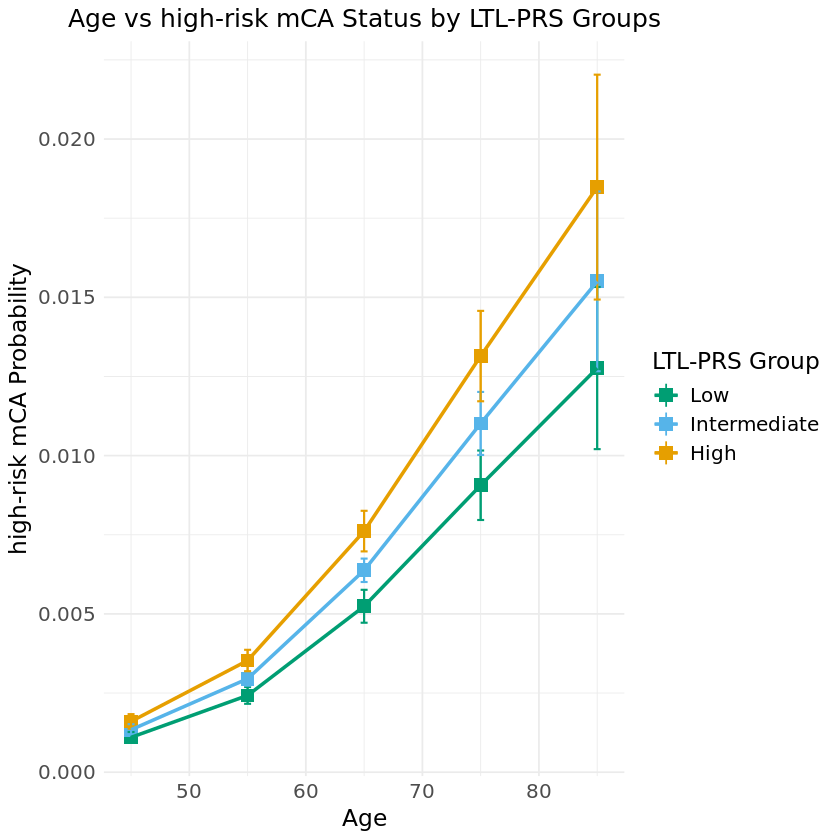

In [49]:
p<- ggplot(age_points, aes(x = age, y = fit, color = ltl_262_coh)) +
  geom_pointrange(aes(ymin = lower, ymax = upper), size = 0.8, shape = 15, fill = "white") + 
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.6, size = 0.6) +
  geom_line(size = 1) +
  scale_color_manual(
    values = c("1" = "#009E73", "2" = "#56B4E9", "3" = "#E69F00"),
    labels = c("1" = "Low", "2" = "Intermediate", "3" = "High")
  ) +
  labs(
    title = "Age vs high-risk mCA Status by LTL-PRS Groups",
    x = "Age",
    y = "high-risk mCA Probability",
    color = "LTL-PRS Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 15),  
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.position = "right",  
    legend.title = element_text(size = 14), 
    legend.text = element_text(size = 12)  
  )
p

In [50]:
save_plot("LTL_PRS_highmCA.svg", fig = p, width=20, height=15)

png 
  2